
# Hate Speech Detection par classification

In [1]:
import pandas as pd
import glob
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path_files = r"/content/drive/MyDrive/Data_M/"

In [4]:
dataset= pd.read_fwf(f"{path_files}dataset_final.txt")

In [5]:
labels = np.load(f"{path_files}final_dataset_labels.npy")

In [6]:
# Ajout de la longueur du texte en tant que variable dans le jeu de données 
dataset['lenght'] = dataset['tweet'].apply(len)

dataset.head()

,tweet,lenght
0,J'adore !! 👍👍,13
1,😂 donc disons tout seulement t'es un skynni,43
2,"Ah non, la violence de ce comeback..Il attenda...",180
3,Ville/Village : LEPETIT-PRESSIGNY,33
4,Encore une nuit sans dormir et je finis à 18h ...,58


In [7]:
#Obtenir les datatypes des colonnes 
dataset.dtypes

tweet     object
lenght     int64
dtype: object

In [8]:
print('Nombre de tweets dans le dataset:', len(dataset))

Nombre de tweets dans le dataset: 23882


In [9]:
dataset['labels']=labels

In [10]:
dataset.head()

,tweet,lenght,labels
0,J'adore !! 👍👍,13,0
1,😂 donc disons tout seulement t'es un skynni,43,0
2,"Ah non, la violence de ce comeback..Il attenda...",180,1
3,Ville/Village : LEPETIT-PRESSIGNY,33,1
4,Encore une nuit sans dormir et je finis à 18h ...,58,1


## Cleaning des tweets 

In [11]:
#vérifier les target values uniques 
dataset['labels'].unique()

array([0, 1])

On remarque qu'il y a seulement deux classes 

In [12]:
# isoler les sentiments targets du fichier csv dans une variable nommée Y
Y = dataset['labels']

print(Y)

0        0
1        0
2        1
3        1
4        1
        ..
23877    0
23878    1
23879    0
23880    1
23881    1
Name: labels, Length: 23882, dtype: int64


In [13]:
#Suppresion des @mention
dataset['tweet'] = dataset['tweet'].apply(lambda x : ' '.join([tweet for tweet in x.split()if not (tweet == "user" or tweet=="rt" or tweet=="url")]))

dataset.head()

,tweet,lenght,labels
0,J'adore !! 👍👍,13,0
1,😂 donc disons tout seulement t'es un skynni,43,0
2,"Ah non, la violence de ce comeback..Il attenda...",180,1
3,Ville/Village : LEPETIT-PRESSIGNY,33,1
4,Encore une nuit sans dormir et je finis à 18h ...,58,1


In [14]:
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

## Analyse exploratoire des données

In [19]:
#Nuage des mots associés aux tweets non haineux 
def wordcloud(dataset, title, num):
  normal_words = ' '.join([word for word in dataset['tweet'][dataset['labels'] == num]])
  wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 100).generate(normal_words)
  print(title)
  plt.figure(figsize= (12,8))
  plt.imshow(wordcloud, interpolation = 'bilinear',cmap='viridis')
  plt.axis('off')

Concernant la version Min dans laquelle on a pas supprimmer les stopwords , on retrouve beaucoup de ceux ci dans notre nuage de mots .

Tweets normaux


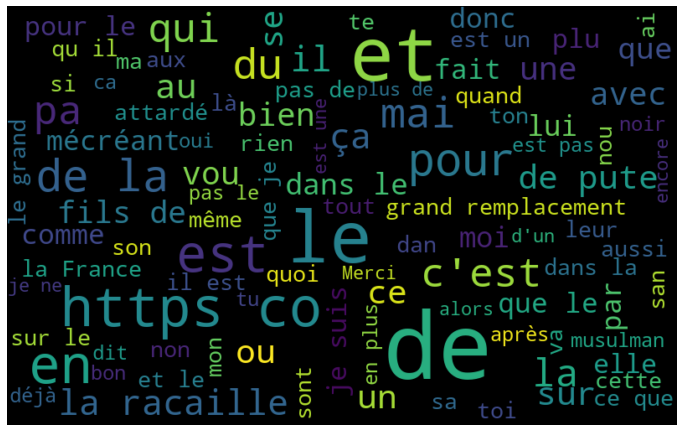

In [22]:
wordcloud(dataset,'Tweets normaux',0)

Tweets haineux


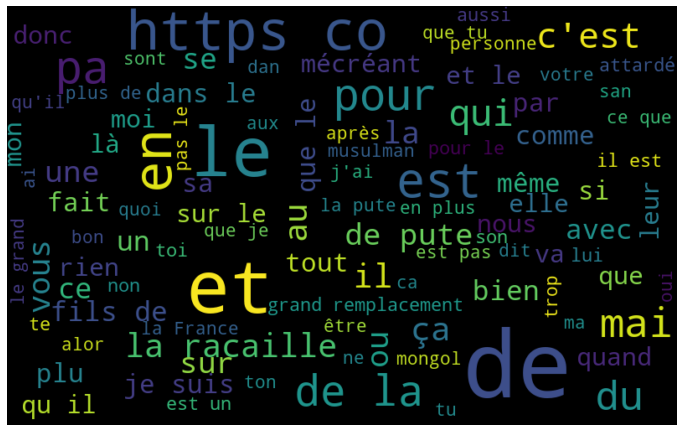

In [21]:
wordcloud(dataset,'Tweets haineux',1)

On remarque que dans les deux nuages de mots , que ce soit celui représentant les tweets haineux et les tweets normaux , le vocabulaire fréquents est similaire , ce qui rendra encore plus difficile la detection des deux classes.

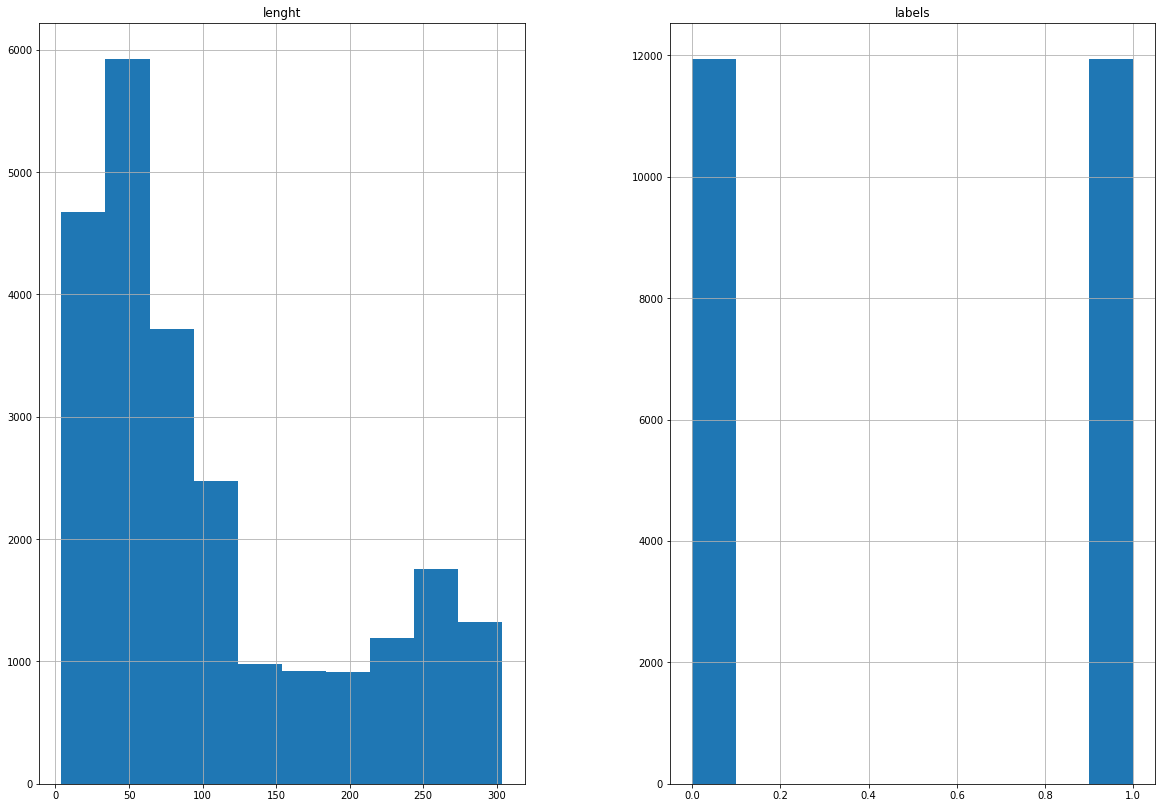

In [23]:
_ = dataset.hist(figsize=(20, 14))

In [24]:
dataset.to_pickle(f"{path_files}dataset_final.pkl")